# LightGBM Algorithm

**LightGBM** is a fast and efficient gradient boosting framework that is based on decision trees. It is designed to be highly scalable and can handle large datasets with ease.

**Key Terms:**

* **Histogram-based gradient boosting**: Instead of using traditional gradient-based optimization, LightGBM uses histogram-based optimization which is much faster and more scalable


<img src="https://www.researchgate.net/publication/349903999/figure/fig3/AS:999262028562433@1615254041436/Histogram-algorithm-of-LightGBM.ppm">

- [LightGBM](https://github.com/Microsoft/LightGBM) is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

  - Faster training speed and higher efficiency.
  - Lower memory usage.
  - Better accuracy.
  - Support of parallel and GPU learning.
  - Capable of handling large-scale data.

`LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
 It means that **LightGBM grows tree leaf-wise** while other algorithms grow level-wise. 
 
 It will choose 
 the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more 
 loss than a level-wise algorithm.`

## LightGBM Classifier Example

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('2_10_breast_cancer_dataset.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


* this breast cancer dataset contains features computed from digitized images of breast mass.
- mean_radius: The average of the distances from the center to points on the perimeter of the cell nuclei.
- mean_texture: The standard deviation of gray-scale values within the cell nuclei. This can indicate the uniformity of the tissue.
- mean_perimeter: The average perimeter of the cell nuclei.
- mean_area: The average area of the cell nuclei.
- mean_smoothness: The average of the local variation in radius lengths, essentially quantifying the smoothness of the cell nuclei's contour.
- diagnosis (target): This is likely the target variable, indicating whether the tumor is malignant (cancerous) or benign (non-cancerous).


**Clean Data and EDA**
--------------

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


**as you see data is very clean👍👍**

In [5]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

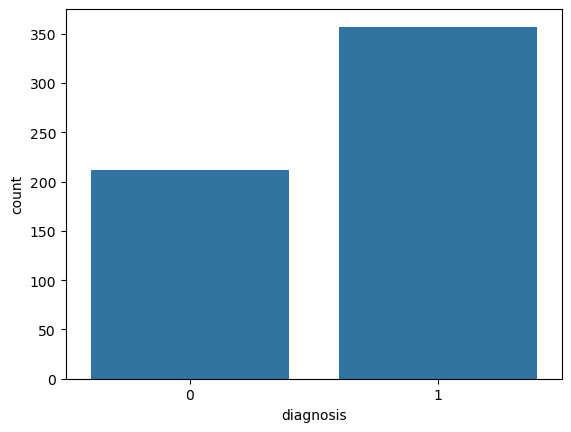

In [6]:
# see with countplot
sns.countplot(x='diagnosis', data=df)
plt.show()

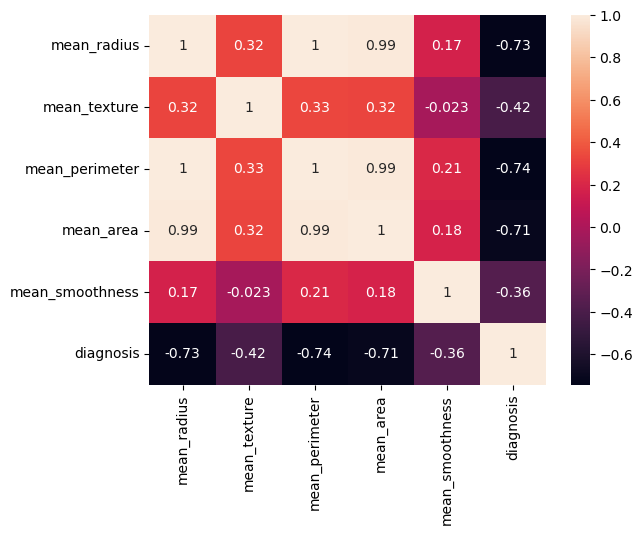

In [7]:
# see correlation between features
sns.heatmap(df.corr(), annot=True)
plt.show()

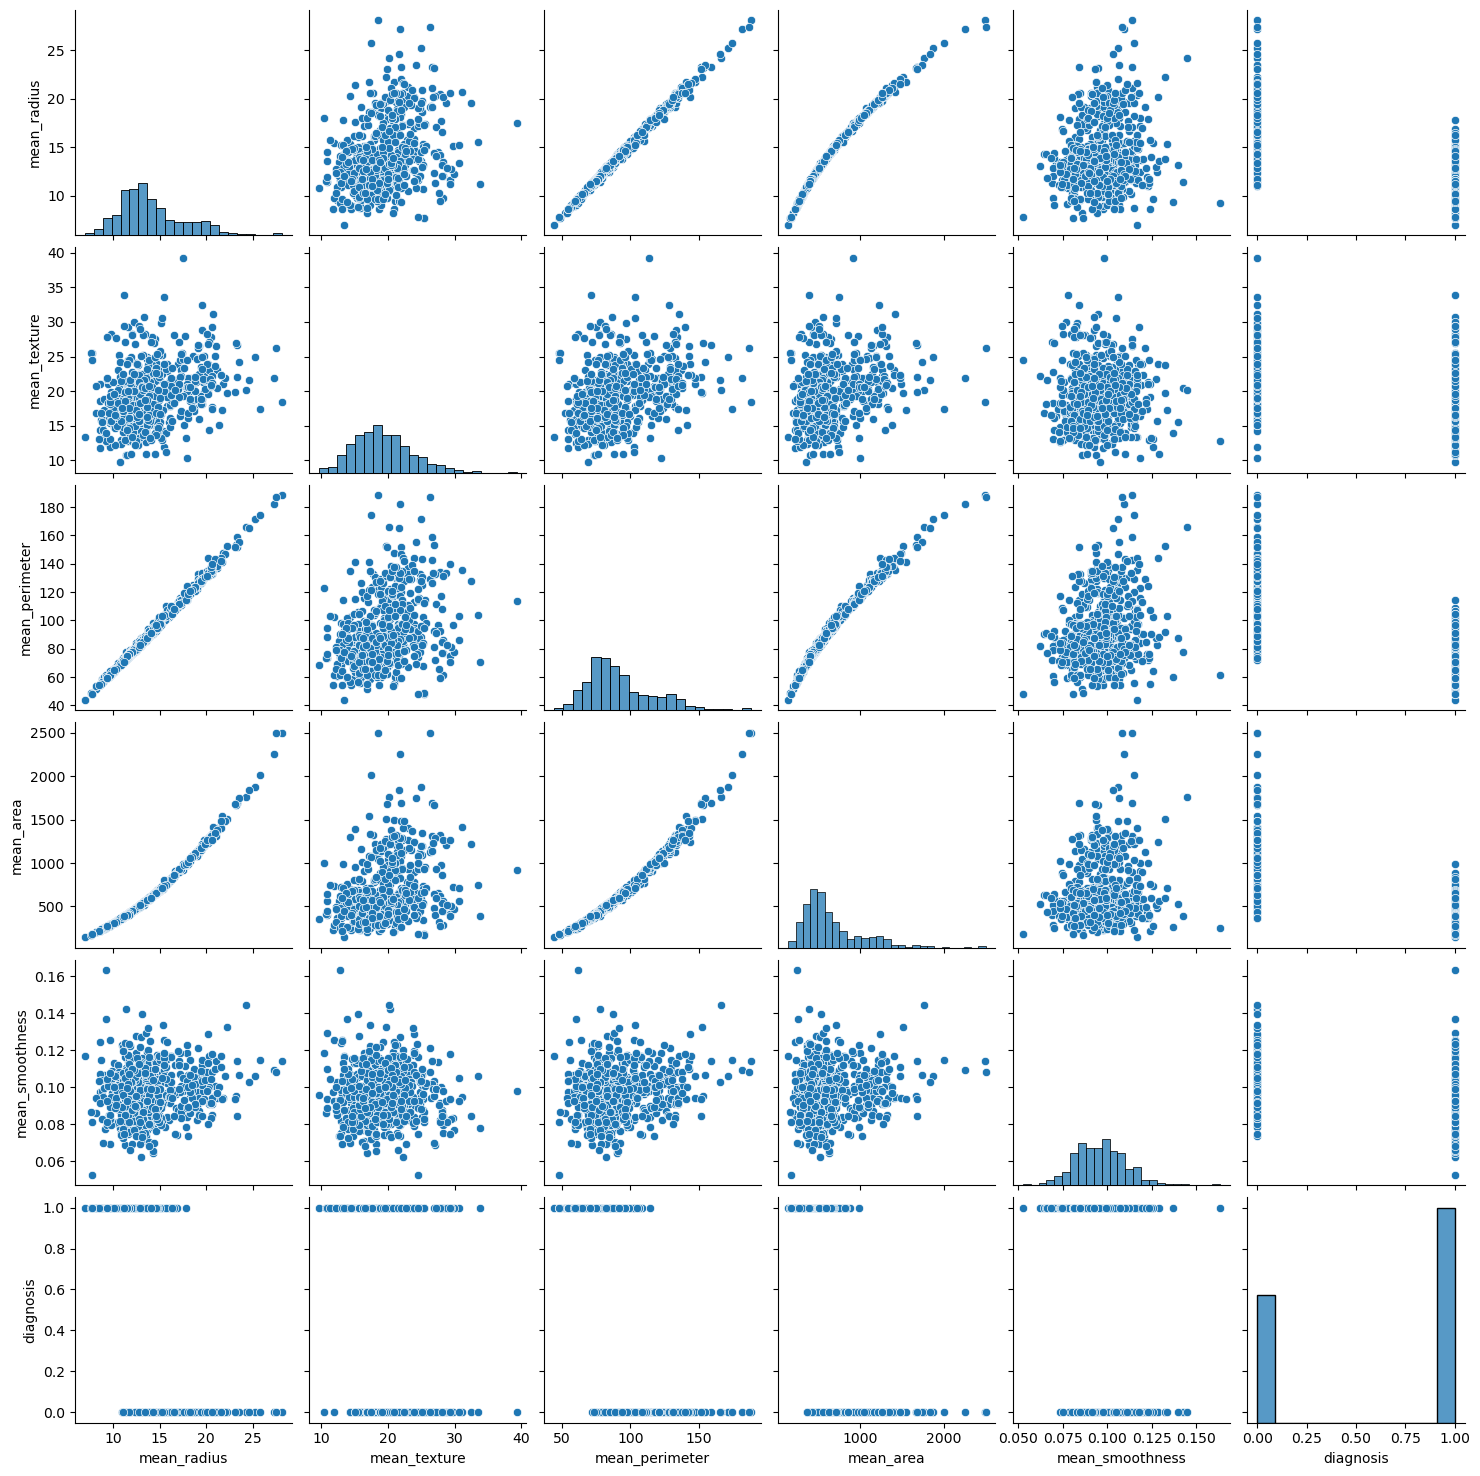

In [8]:
# see the pairplot of the dataset
sns.pairplot(df)
plt.show()

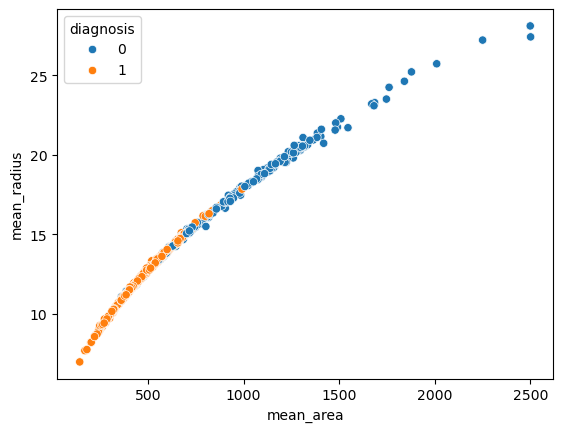

In [9]:
# see the meaan are hue diagnosis
sns.scatterplot(x='mean_area', y='mean_radius', hue='diagnosis', data=df)
plt.show()

* **as I understand, lower mean_area means seems malignant!**

**Train Model**
-------------

In [11]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [13]:
# split dataset X and y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [14]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 5)
X_test shape: (114, 5)
y_train shape: (455,)
y_test shape: (114,)


In [16]:
# install lightgbm
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 724.7 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 940.1 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00


In [17]:
# import lightgbm
import lightgbm as lgb


In [ ]:
model=lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

In [20]:
# predict results
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [21]:
# see accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[41  2]
 [ 4 67]]


In [22]:
# compare the result with XGBoost Algorithm

In [23]:
!pip install xgboost

In [24]:
# import xgboost
import xgboost as xgb

In [25]:
model_xgb=xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
# prediction and see results
y_pred_xgb = model_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[42  1]
 [ 5 66]]


In [27]:
# Hyperparameter Tuning of LightGBM
from sklearn.model_selection import RandomizedSearchCV

In [28]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 2, 3]
}

In [34]:
model_lgb = lgb.LGBMClassifier()

In [36]:
random_search = RandomizedSearchCV(model_lgb, parameters, cv=5, random_state=42)
random_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.2],
                                        'reg_lambda': [1, 2, 3],
                                        'subsample': [0.8, 1.0]},
                   random_state=42)

In [39]:
best_params=random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [40]:
# try with best params
model_lgb = lgb.LGBMClassifier(**best_params)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga